<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Laplacian eigenmaps

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Spectral Methods</font></h1>

<hr/>

- [Spectral embedding](https://scikit-learn.org/stable/modules/manifold.html#spectral-embedding)

> Construct the (latent) coordinates based on a given "similarity" graph or matrix
> 

- [Spectral clustering](https://en.wikipedia.org/wiki/Spectral_clustering)

> Use these new coordinates as input to the usual methods <br>
> E.g., simple thresholding, K-means clustering

## [Adjacency Matrix](https://en.wikipedia.org/wiki/Adjacency_matrix)

- Are two objects "close"? Are the vertices connected?

> Encode it in an $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

## Graph Laplacian

- [Degree matrix](https://en.wikipedia.org/wiki/Degree_matrix) $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$

- What's so special abou this?!

## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- Interesting property

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 $ 

## Minimization

- Solution: smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution (constant) <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


### Example in Matlab

> If interested, also check out the Matlab code and documentation at
> https://www.cs.purdue.edu/homes/dgleich/demos/matlab/spectral/spectral.html

## [Numpy's *newaxis*](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html)

## Step by step

In [ ]:
from sklearn import datasets

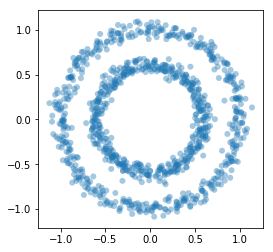

In [2]:
np.random.seed(3) # try other seeds, e.g., 0

X, c = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.4, edgecolor='none');

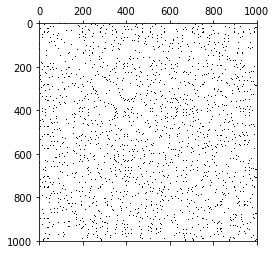

In [3]:
d =  X[newaxis,:,:] - X[:,newaxis,:]
d2 = (d*d).sum(axis=2)
A = (d2<0.04).astype(np.float) # distance threshold 
np.fill_diagonal(A,0); spy(A);

In [ ]:
from scipy.linalg import eigh # different solvers
from scipy.sparse.linalg import eigsh

[-7.19817776e-15  3.81643875e-02  1.81071962e-01]
(3,) (1000, 3)


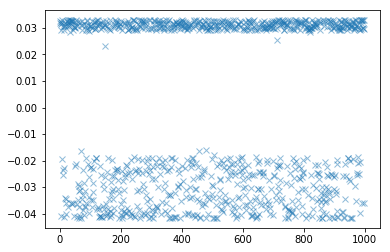

In [4]:
dd = A.sum(axis=0)
D = diag(dd)

L = D - A

w, v = eigsh(L, 3, which='SA', tol=1e-2)

print (w[0:4])
print (w.shape, v.shape)
#plot(w)

figure()
plot(v[:,1], 'x', alpha=0.5);

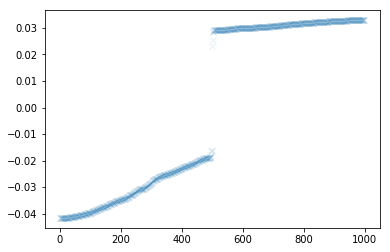

In [5]:
s = argsort(v[:,1]); plot(v[s,1],'x',alpha=0.1);

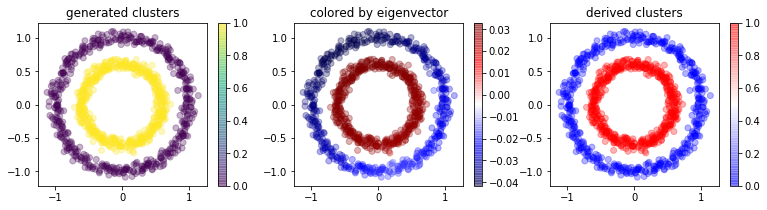

In [6]:
figure(figsize=(13,3)); 

subplot(131,aspect='equal'); scatter(X[:,0],X[:,1],c=c,alpha=0.3); 
colorbar(); title('generated clusters');

subplot(132,aspect='equal'); scatter(X[:,0],X[:,1],c=v[:,1],cmap=cm.seismic,alpha=0.3); 
colorbar(); title('colored by eigenvector');

subplot(133,aspect='equal'); scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap=cm.bwr, alpha=0.3); 
colorbar(); title('derived clusters');

## Using weights

- Instead of the 0/1 in the adjacency matrix $A$, we use a weight matrix $W$

[1.96111928e-15 5.95166131e-02 7.74030224e-02]


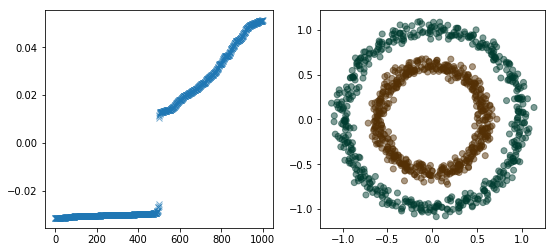

In [7]:
# Weight matrix 
d =  X[newaxis,:,:] - X[:,newaxis,:]
d2 = (d*d).sum(axis=2)

W = exp(-d2 / 0.016)
np.fill_diagonal(W,0)

# Laplacian
dd = W.sum(axis=0)
D = diag(dd)
L = D - W

# eigenproblem
w, v = eigsh(L, 3, which='SM')
labels = v[:,1] > 0
print (w[:4])

# plots
figure(figsize=(9,4)); subplot(121);

s = argsort(v[:,1]); plot(v[s,1], 'x', alpha=0.6);
subplot(122,aspect='equal')
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5);

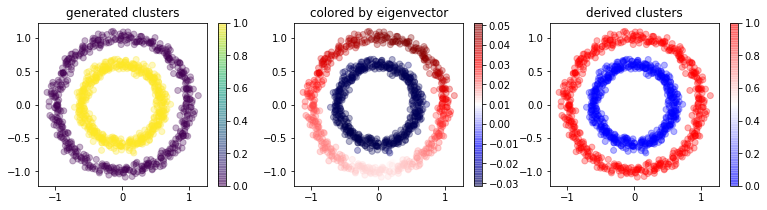

In [8]:
figure(figsize=(13,3)); 

subplot(131,aspect='equal'); scatter(X[:,0],X[:,1],c=c,alpha=0.3); 
colorbar(); title('generated clusters');

subplot(132,aspect='equal'); scatter(X[:,0],X[:,1],c=v[:,1],cmap=cm.seismic,alpha=0.3); 
colorbar(); title('colored by eigenvector');

subplot(133,aspect='equal'); scatter(X[:,0],X[:,1],c=(v[:,1]>0),cmap=cm.bwr, alpha=0.3); 
colorbar(); title('derived clusters');

## Embedding coordinates

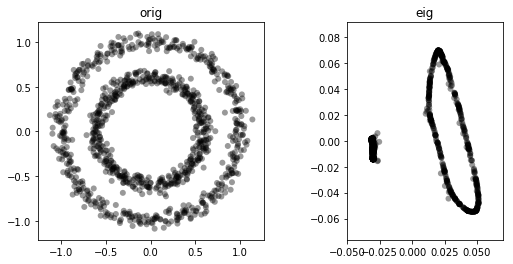

In [9]:
figure(figsize=(9,4)); 

subplot(121,aspect='equal');
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); title('eig');

## Embedding with scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html)



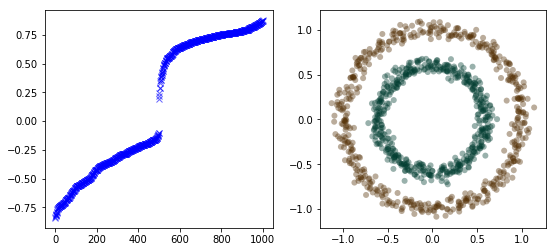

In [10]:
from sklearn.manifold import spectral_embedding

e = spectral_embedding(adjacency=W, n_components=3, norm_laplacian=False,
                       drop_first=False)
s = argsort(e[:,1]) 

figure(figsize=(9,4)) 
subplot(121); plot(e[s,1], 'xb', alpha=0.6)
subplot(122, aspect='equal')
scatter(X[:,0],X[:,1],c=(e[:,1]>0),cmap=cm.BrBG,edgecolor='none',alpha=0.4);

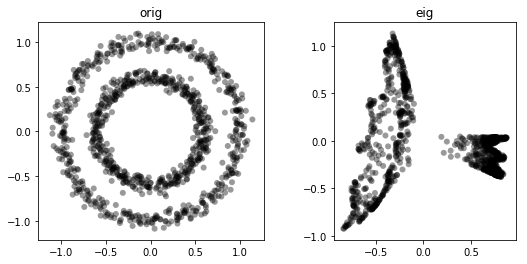

In [11]:
figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c='k',edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(e[:,1],e[:,2],c='k',edgecolor='none',alpha=0.4); title('eig');

## Alternatively

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)


In [12]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=3, n_neighbors=20)

f = se.fit_transform(X)

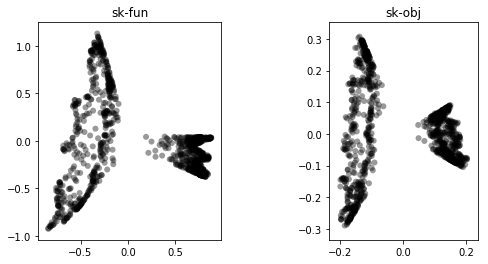

In [13]:
figure(figsize=(9,4)); 

subplot(121,aspect='equal');
scatter(e[:,1],e[:,2],c='k',edgecolor='none',alpha=0.4); title('sk-fun');

subplot(122,aspect='equal');
scatter(f[:,0],f[:,1],c='k',edgecolor='none',alpha=0.4); title('sk-obj');

## Parameters

- Often we use a combination of two parameters

> $k$: number of neighbors to consider for similarity graph

> $\epsilon$: bandwidth of the $\exp\left(-d^2/\epsilon\right)$ similarity

## Clustering scikit-learn

> See online [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

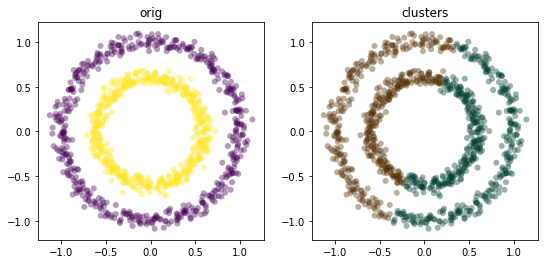

In [14]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)
clusters = sc.fit_predict(X)

figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c=c,edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(X[:,0],X[:,1],c=clusters,cmap=cm.BrBG,edgecolor='none',alpha=0.4); title('clusters');

## Exercise

> What's wrong with the above clustering?

> Read the documentation and fix the code

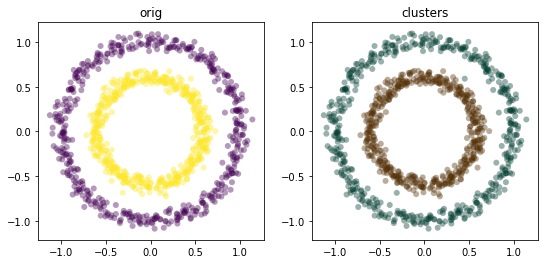

In [15]:
sc = SpectralClustering(n_clusters=2, gamma=100)
clusters = sc.fit_predict(X)

figure(figsize=(9,4)); 

subplot(121,aspect='equal')
scatter(X[:,0],X[:,1],c=c,edgecolor='none',alpha=0.4); title('orig');

subplot(122,aspect='equal');
scatter(X[:,0],X[:,1],c=clusters,cmap=cm.BrBG,edgecolor='none',alpha=0.4); title('clusters');

## Did you notice the differences?

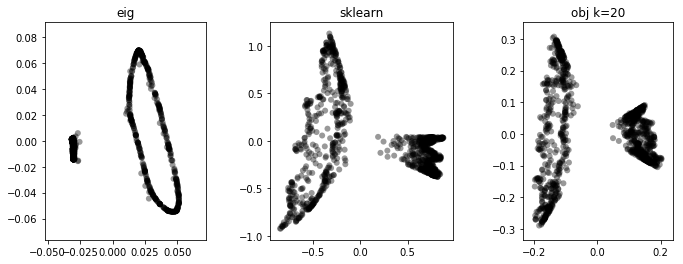

In [16]:
figure(figsize=(12,4)); 

subplot(131,aspect='equal');
scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); title('eig');

subplot(132,aspect='equal');
scatter(e[:,1],e[:,2],c='k',edgecolor='none',alpha=0.4); title('sklearn');

subplot(133,aspect='equal');
scatter(f[:,0],f[:,1],c='k',edgecolor='none',alpha=0.4); title('obj k=20');

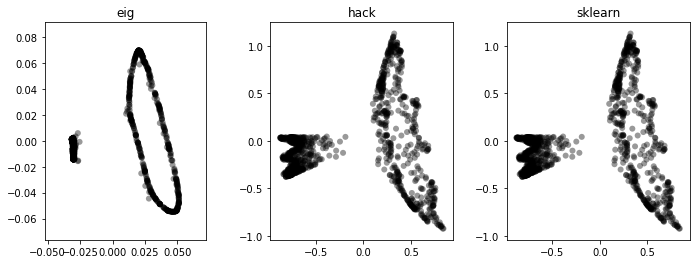

In [17]:
figure(figsize=(12,4)); 

subplot(131,aspect='equal');
scatter(v[:,1],v[:,2],c='k',edgecolor='none',alpha=0.4); title('eig');

subplot(132,aspect='equal');
t = v * dd[:,newaxis]
scatter(t[:,1],t[:,2],c='k',edgecolor='none',alpha=0.4); title('hack');

subplot(133,aspect='equal');
scatter(-e[:,1],e[:,2],c='k',edgecolor='none',alpha=0.4); title('sklearn');